<a href="https://colab.research.google.com/github/Digitall-Ivan/Data_Analytics_course/blob/main/Ivan_Zakorchevnyi_HW_15_ML_prediction_India_rent_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Завантажив дані
df = pd.read_csv("/content/drive/MyDrive/I LOVE DATA EDU COURSE/RAWDATA/House_Rent_Dataset.csv")

# Розмір датасету
df.shape

# Отримав перші 5 рядків
df.head()

# Отримав інформацію про дані
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Висновок: Немає пропущених значень (усі колонки мають 4746 значень).

Є 4 числові змінні (BHK, Rent, Size, Bathroom).

Решта 8 змінних — текстові (City, Area Type, Floor, Tenant Preferred тощо).

## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


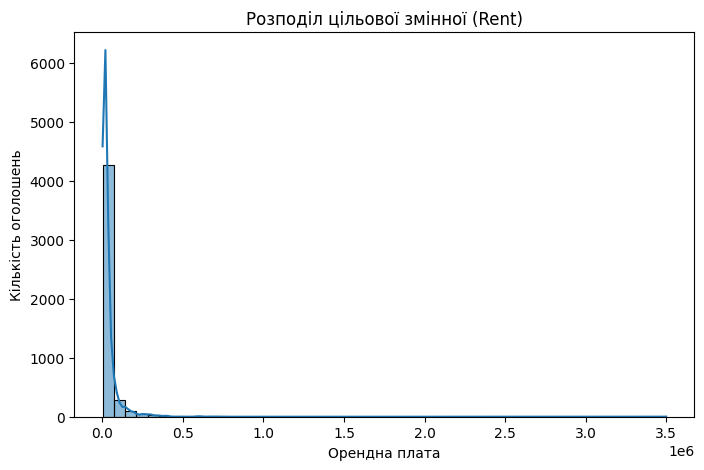

(                   Пропущені значення  Відсоток (%)
 Posted On                           0           0.0
 BHK                                 0           0.0
 Rent                                0           0.0
 Size                                0           0.0
 Floor                               0           0.0
 Area Type                           0           0.0
 Area Locality                       0           0.0
 City                                0           0.0
 Furnishing Status                   0           0.0
 Tenant Preferred                    0           0.0
 Bathroom                            0           0.0
 Point of Contact                    0           0.0,
            count          mean           std     min      25%      50%  \
 BHK       4746.0      2.083860      0.832256     1.0      2.0      2.0   
 Rent      4746.0  34993.451327  78106.412937  1200.0  10000.0  16000.0   
 Size      4746.0    967.490729    634.202328    10.0    550.0    850.0   
 Bathroom 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Провів аналіз пропущених значень
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({"Пропущені значення": missing_values, "Відсоток (%)": missing_percent})

# 2. Наводжу базову статистику для числових змінних
numeric_stats = df.describe().T

# 3. Отримав гістограму цільової змінної (Rent)
plt.figure(figsize=(8,5))
sns.histplot(df['Rent'], bins=50, kde=True)
plt.title("Розподіл цільової змінної (Rent)")
plt.xlabel("Орендна плата")
plt.ylabel("Кількість оголошень")
plt.show()

# 4. Провів роботу з викидами: за допомогою IQR
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Rent'] < lower_bound) | (df['Rent'] > upper_bound)]
df_no_outliers = df[(df['Rent'] >= lower_bound) & (df['Rent'] <= upper_bound)]

# 5. Отримав кількість унікальних значень для категоріальних змінних
categorical_cols = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].nunique() for col in categorical_cols}

missing_df, numeric_stats, outliers.shape, df_no_outliers.shape, unique_values


Висновок:
*   У датасеті практично немає пропусків.
*   Розкид у змінній Rent дуже великий - маємо потенційні викиди. Більшість значень в діапазоні 10–33 тис. INR. Середнє по вибірці - близько 35 тис. Є значення у сотнях тисяч та навіть мільйонах, які очевидно не відповідають типовим ринковим цінам. (Наведена гістограма підтверджує це — маємо довгий «хвіст» справа).
*   Викиди - по методу IQR (міжквартильний розмах). Нижня межа становить близько 30 000. Верхня межа близько 73 000 INR. Відповідно 520 рядків можемо вважати викидами. Дані без викидів - 4226 рядків (близько 90% даних)
*   Аналіз категоріальних змінних:
  * Posted On	81
  * Floor	480
  * Area Type	3
  * Area Locality	2235
  * City	6
  * Furnishing Status	3
  * Tenant Preferred	3
  * Point of Contact	3

Відповідно, найбільш різноманітна колонка — Area Locality (2235 районів). Очевидно, для побудови моделі потрібно буде робити encoding цих змінних. В цілому, дані досить чисті, окрім кількох аномальних значень, які буде необхідно прибрати.





## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


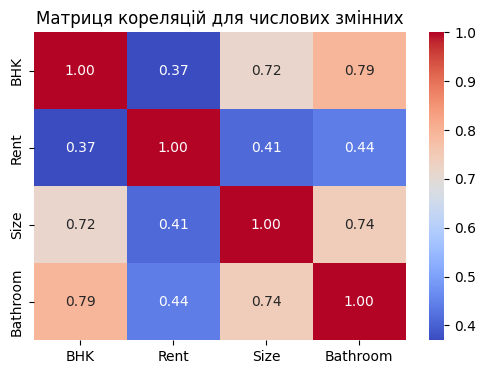

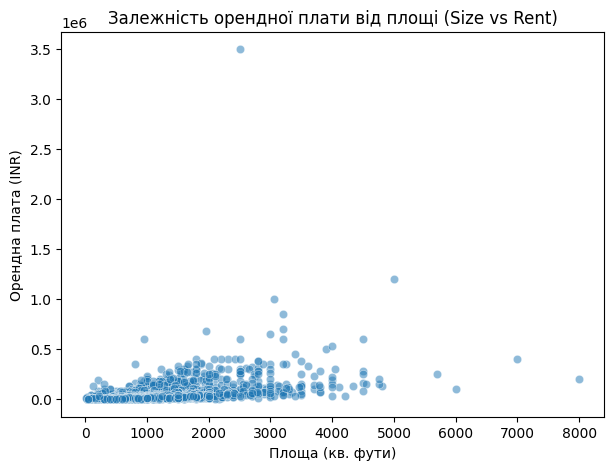

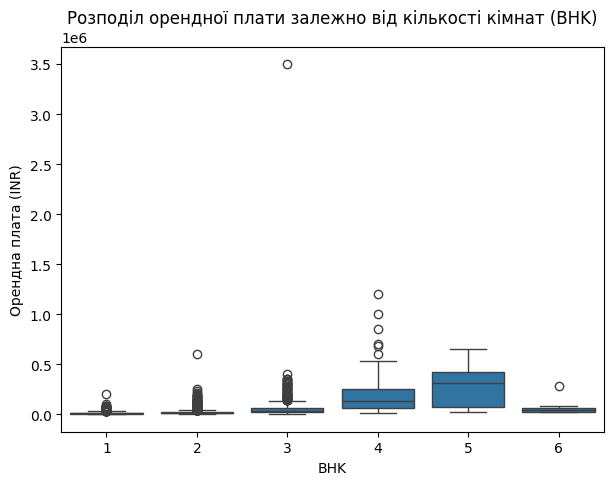

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Побудував матрицю кореляцій для числових змінних
corr_matrix = df.corr(numeric_only=True)

# 2. Створив Heatmap для кореляцій
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матриця кореляцій для числових змінних")
plt.show()

# 3. Побудував Scatter plot між Size та Rent
plt.figure(figsize=(7,5))
sns.scatterplot(x="Size", y="Rent", data=df, alpha=0.5)
plt.title("Залежність орендної плати від площі (Size vs Rent)")
plt.xlabel("Площа (кв. фути)")
plt.ylabel("Орендна плата (INR)")
plt.show()

# 4. Побудував Boxplot між BHK та Rent
plt.figure(figsize=(7,5))
sns.boxplot(x="BHK", y="Rent", data=df)
plt.title("Розподіл орендної плати залежно від кількості кімнат (BHK)")
plt.xlabel("BHK")
plt.ylabel("Орендна плата (INR)")
plt.show()

corr_matrix


Висновки:
* BHK і Bathroom дуже сильно пов’язані (r ≈ 0.79) → більше кімнат → більше ванних.

* Size і BHK також сильно корелюють (r ≈ 0.72) → більше кімнат → більша площа.

* Rent помірно корелює з Size (0.41) та Bathroom (0.44).

* Загалом оренда зростає зі збільшенням площі та кількості кімнат, але зв’язок не ідеально лінійний (є інші фактори — місто, район).

Візуалізація Heatmap підтверджує вищенаведені залежності: найсильніші кореляції між BHK, Bathroom та Size.

Аналіз Scatter plot: Size vs Rent

Очевидно, що є позитивний тренд: більша площа → вища орендна плата.

Проте спостерігаємо великий розкид: для однакової площі оренда може відрізнятися в рази. Це можна пояснити локацією, районом, станом меблювання та іншими категоріальними змінними.

Аналіз Boxplot: BHK vs Rent

Зі збільшенням кількості кімнат медіанна оренда зростає. Але в межах кожної категорії є великий розкид: наприклад, 2-BHK може коштувати як 10 тис., так і понад 50 тис. INR. Це підтверджує, що BHK впливає на орендну плату, але це вирішальний фактор.

Таким чином, для розробки більш точної моделі обов’язково потрібно враховувати категоріальні ознаки (місто, район, стан меблів, бажаний орендар).

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Виключив колонки з великою кількістю унікальних значень
df_fe = df.drop(columns=["Posted On", "Area Locality", "Floor"])

# 2. Провів One-Hot Encoding для категоріальних змінних з невеликою кількістю категорій
categorical_cols = ["City", "Area Type", "Furnishing Status", "Tenant Preferred", "Point of Contact"]
df_encoded = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)

# 3. Опціонально: додав створення нових ознак (площа на одну кімнату)
df_encoded["Size_per_BHK"] = df_encoded["Size"] / df_encoded["BHK"]

# 4. Провів вибір ознак (X) та цільової змінної (y)
X = df_encoded.drop(columns=["Rent"])
y = df_encoded["Rent"]

# 5. Розділив на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Стандартизація числових ознак
scaler = StandardScaler()
numeric_cols = ["BHK", "Size", "Bathroom", "Size_per_BHK"]
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train.head(), X_train.shape, y_train.shape

(           BHK      Size  Bathroom  City_Chennai  City_Delhi  City_Hyderabad  \
 1995 -0.107739 -0.026920  0.035666         False       False           False   
 1497 -0.107739 -0.263117  0.035666         False       False           False   
 2763 -1.300098 -0.664654 -1.092556         False        True           False   
 1351 -1.300098 -0.790626 -1.092556         False       False           False   
 1862 -0.107739 -0.105652  0.035666         False       False           False   
 
       City_Kolkata  City_Mumbai  Area Type_Carpet Area  Area Type_Super Area  \
 1995         False        False                  False                  True   
 1497         False        False                  False                  True   
 2763         False        False                  False                  True   
 1351         False         True                  False                  True   
 1862         False        False                  False                  True   
 
       Furnishing Status

Висновок:
1.   Виключені колонки (з великою кількістю унікальних значень): Posted On (дати), Area Locality (2235 унікальних значень), Floor (480 унікальних значень)
2.   Кодування One-Hot Encoding застосовано до: City (6 міст → 5 dummy-колонок),Area Type (3 значення → 2 dummy-колонки), Furnishing Status (3 значення → 2 dummy-колонки), Tenant Preferred (3 значення → 2 dummy-колонки), Point of Contact (3 значення → 2 dummy-колонки)
3. Створена нова ознака: Size_per_BHK = Size / BHK → співвідношення площі на одну кімнату.

Отримав наступний розмір даних після підготовки:
X_train: 3796 рядків × 17 ознак
y_train: 3796 цільових значень

Виконав стандартизацію даних.  До числових ознак (BHK, Size, Bathroom, Size_per_BHK) застосовано StandardScaler → тепер усі вони мають середнє 0 і стандартне відхилення 1.

Отже, отриманий датасет готовий для навчання моделі: маємо збалансований набір числових і закодованих категоріальних ознак.

## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [11]:
from sklearn.linear_model import LinearRegression

# 1. Створив та провів навчання моделі
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 2. Отримав коефіцієнти моделі
coefficients = pd.Series(lin_reg.coef_, index=X_train.columns).sort_values(key=abs, ascending=False)

# 3. Отримав прогнози
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

coefficients, y_pred_train[:5], y_pred_test[:5]


(City_Mumbai                          49326.100828
 Size                                 36074.482234
 Point of Contact_Contact Builder     22780.419302
 City_Hyderabad                      -16897.056974
 Tenant Preferred_Family             -11588.397982
 Bathroom                             11464.532935
 Size_per_BHK                        -10655.436867
 Area Type_Super Area                 -9893.825015
 Furnishing Status_Semi-Furnished     -8973.878271
 Point of Contact_Contact Owner       -8458.129484
 Furnishing Status_Unfurnished        -8342.826809
 City_Chennai                         -7943.073473
 Area Type_Carpet Area                -6961.216508
 City_Delhi                            6504.598295
 BHK                                  -6299.643916
 City_Kolkata                         -2655.101545
 Tenant Preferred_Bachelors/Family    -1036.100237
 dtype: float64,
 array([23520.49247738, 18672.4471345 ,  7142.13352355, 41398.98892969,
        30878.35563387]),
 array([28999.5892

Навчання моделі:

* Отримані дані було поділено на train (80%) та test (20%).

* Використано модель LinearRegression з бібліотеки sklearn.

* Модель навчена на приблизно 3796 прикладах (train датасет).

Коефіцієнти моделі (ваги)

Найбільший вплив на орендну плату мають:

City_Mumbai → +49 326 INR (належність до Мумбаї різко збільшує прогнозовану орендну плату).

Size → +36 074 INR (зростання площі напряму підвищує прогнозовану оренду).

Інші вагомі фактори:

Point of Contact_Contact Builder (+22 780)

City_Hyderabad (–16 897)

Tenant Preferred_Family (–11 588)

Bathroom (+11 464)

Отримані прогнози:
* Тренувальна вибірка (y_train → y_pred_train):[23520, 18672,  7142, 41399, 30878]
* Тестова вибірка (y_test → y_pred_test): [28999, 19703, 61816, 69030, 99157]
Таким чином, отримана модель добре відтворює залежність між містами та розмірами квартир: маленькі → дешевші, великі → дорожчі.

Найбільш сильний драйвер → місто (особливо Mumbai та околиці).

Діапазон прогнозів широкий (від 7 тис. до 99 тис. INR), що відповідає реальній ситуації на ринку Індії.

Для надвисоких цін (200k+ INR) модель може недооцінювати вартість, оскільки ми прибрали викиди та даних недостатньо.

Додатково значення мають кількість ванних кімнат та деякі категоріальні змінні (тип контакту, орендар, місто).

## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


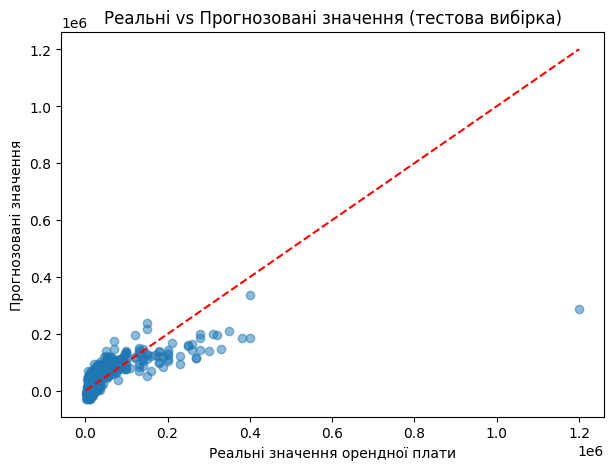

(22659.257674947334,
 np.float64(68614.62213675707),
 0.2897114355250867,
 21913.779339086006,
 np.float64(42985.82486545856),
 0.5363602645995998)

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Отримав метрики моделі
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Виконав візуалізацію "реальні vs прогнозовані значення"
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Реальні значення орендної плати")
plt.ylabel("Прогнозовані значення")
plt.title("Реальні vs Прогнозовані значення (тестова вибірка)")
plt.show()

(mae_train, rmse_train, r2_train, mae_test, rmse_test, r2_test)


Отримані метрики якості моделі:

* Train (80% даних):

MAE = 22 659

RMSE = 68 615

R² = 0.29

* Test (20% даних):

MAE = 21 914

RMSE = 42 986

R² = 0.54

Висновки по метриках:

* MAE близбко 22 тис. INR означає, що середня помилка прогнозу становить ~22 тисячі рупій.

* RMSE значно більше за MAE, що свідчить про наявність ще досить великих помилок (через наявність дорогі квартири).

* R² = 0.54 (тест) — модель прогнозує близько 54% варіації орендної плати. Це можна вважати прийнятним результатом для простої лінійної регресії з такими даними.

Train R² = 0.29, Test R² = 0.54 — якість на тестових навіть вища, ніж на train → немає ознак перенавчання моделі. Навпаки, є певне недонавчання (модель занадто проста для складних залежностей у даних).

Аналіз реальних vs прогнозованих значень (scatter plot)

На графіку видно точки розкидані навколо лінії y=x (пратично ідеальні прогнози). Для дешевших квартир (до ~50 тис. INR) модель більш-менш точна. Для дорогих квартир (100k+) модель може недооцінювати ціну.

Таким чином, Модель краще працює в середньому ціновому сегменті. Для покращення результатів прогнозування можна:

* застосувати нелінійні моделі;

* врахувати більше взаємодій між ознаками;

* провести більш глибоку роботу з ознаками (feature engineering).

## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

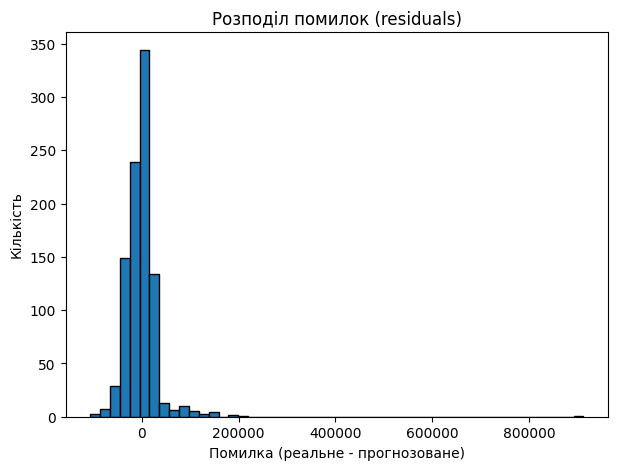

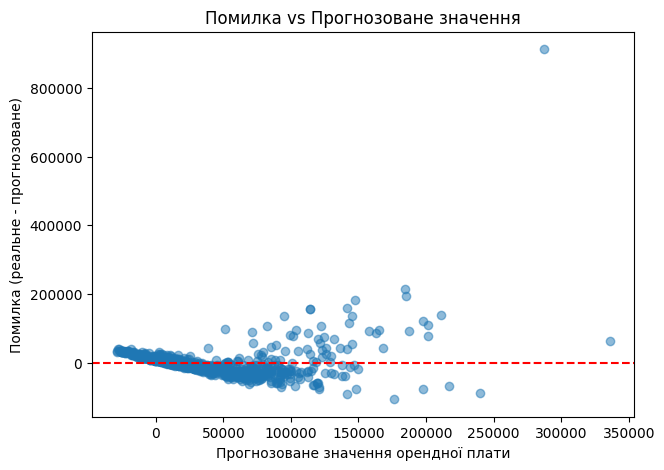

In [14]:
# 1. Провів обчислення помилок (residuals)
residuals = y_test - y_pred_test

# 2. Отримав гістограму розподілу помилок
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title("Розподіл помилок (residuals)")
plt.xlabel("Помилка (реальне - прогнозоване)")
plt.ylabel("Кількість")
plt.show()

# 3. Побудував Scatter plot: помилки vs прогнозовані значення
plt.figure(figsize=(7,5))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Прогнозоване значення орендної плати")
plt.ylabel("Помилка (реальне - прогнозоване)")
plt.title("Помилка vs Прогнозоване значення")
plt.show()

In [16]:
y_pred_test_series = pd.Series(y_pred_test, index=y_test.index)

# Провів перерахунок топ-5 найбільших помилок
residuals = y_test - y_pred_test_series
abs_residuals = abs(residuals)
top5_idx = abs_residuals.sort_values(ascending=False).head(5).index

top5_errors = pd.DataFrame({
    "Real": y_test.loc[top5_idx],
    "Predicted": y_pred_test_series.loc[top5_idx],
    "Residual": residuals.loc[top5_idx]
})

In [17]:
# Перевірив, які категорії міст є у X_train/X_test після One-Hot Encoding
city_columns = [col for col in X.columns if col.startswith("City")]
city_columns[:10]

# Обрав колонки для аналізу - лише ті, які реально є після One-Hot Encoding
cols_for_analysis = ["BHK", "Bathroom", "Size"] + city_columns
error_analysis = df_encoded.loc[top5_idx, cols_for_analysis]
pd.concat([top5_errors.reset_index(drop=True), error_analysis.reset_index(drop=True)], axis=1)

,Real,Predicted,Residual,BHK,Bathroom,Size,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,1200000,287191.840197,912808.159803,4,4,5000,False,False,False,False,True
1,400000,184759.414478,215240.585522,4,4,2500,False,False,False,False,True
2,380000,184992.585932,195007.414068,4,5,3500,False,False,False,False,False
3,330000,147421.378443,182578.621557,3,3,3600,True,False,False,False,False
4,300000,141833.323966,158166.676034,3,3,1800,False,False,False,False,True


Висновки:
1.   Помилки обчислені як різниця між реальними та прогнозованими значеннями та показують наскільки отримана модель сильно модель «недооцінила» або «переоцінила» орендну плату.
2.   Гістограма розподілу помилок показує, що вони в основному зосереджені в діапазоні –50k … +50k INR. Також спостерігається довгий «хвіст» праворуч → як вже зазанчалось, модель сильно недооцінює дорогі квартири (300k+ INR).
3. Аналіз scatter plot: помилкb vs прогнозовані значення: для малих і середніх прогнозів (до 50k INR) помилки незначні. Для великих прогнозів (>100k INR) розкид різко зростає → чим дорожче житло, тим важче моделі точно передбачити ціну.
4. Топ-5 найбільших помилок - це дорогі квартири з великою площею (1800–5000 кв.ф., 3–4 BHK), головним чином у Mumbai та Chennai.
5. Таким чином, модель добре працює на дешевому та середньому сегменті, але сильно недооцінює преміальні квартири. Це типовий випадок, коли лінійна регресія не справляється з нелінійними та складними залежностями.



Пропозиції та наступні кроки для покращення:
1. Спробувати більш потужні нелінійні моделі: Random Forest, Gradient Boosting, .

2. Провести логарифмування цільової змінної (Rent), щоб зменшити вплив великих значень.

3. Додати більше ознак: взаємодії (наприклад, BHK × City), щільність населення району, відстань до центру міста.

4. Провести кластеризацію по містах та побудувати окремі моделі для великих міст Mumbai, Delhi та, відповідно, дешевших міст.